In [1]:
## Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
## Load and display dataset
df=pd.read_csv("D:/fraud_check.csv")
print(df.head(2))

  Undergrad Marital_Status  Taxable_Income  City_Population  Work_Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   

  Urban  
0   YES  
1   YES  


In [5]:
## Convert to categorical target variable
df['Risk'] = df['Taxable_Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [7]:
## drop taxable_income from dataset
df.drop('Taxable_Income', axis=1, inplace=True)


In [9]:
## Data cleaning
df.isnull().sum()

Undergrad          0
Marital_Status     0
City_Population    0
Work_Experience    0
Urban              0
Risk               0
dtype: int64

In [11]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [13]:
## check encoded dataframe datatypes
df_encoded.dtypes

City_Population           int64
Work_Experience           int64
Undergrad_YES              bool
Marital_Status_Married     bool
Marital_Status_Single      bool
Urban_YES                  bool
Risk_Risky                 bool
dtype: object

In [15]:
## define features and target variable
X = df_encoded.drop('Risk_Risky', axis=1)  # Features

 
y = df_encoded['Risk_Risky']  # Target


In [17]:
## Encode target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [19]:
## check the data of features
X.shape

(600, 6)

In [21]:
## split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [23]:
## Train the Random forest model
model = RandomForestClassifier(criterion='gini')

In [25]:
## fit the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
## model score
model.score(X_train,y_train)

1.0

In [29]:
## prediction
pred = model.predict(X_test)

In [31]:
##Accuracy score
accuracy_score(y_test, pred)

0.7

In [35]:
# Calculate MSE
mse = mean_squared_error(y_test, pred)
print("MSE for Random Forest classification - ", mse)

# Calculate RMSE
rmse = np.sqrt(mse)

print("RMSE for Random Forest classification - ", rmse)


MSE for Random Forest classification -  0.3
RMSE for Random Forest classification -  0.5477225575051661


In [142]:
## Confusion matrix
confusion_matrix(y_test, pred)

array([[83,  9],
       [27,  1]], dtype=int64)

In [144]:
## Feature importance
model.feature_importances_

array([0.52956968, 0.34133797, 0.03732507, 0.03072371, 0.0285595 ,
       0.03248408])

<Axes: >

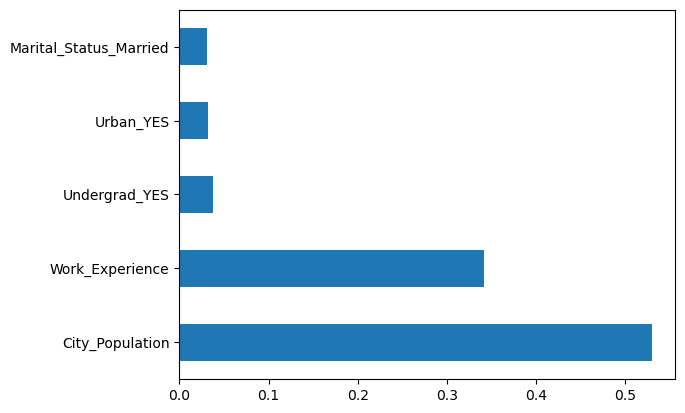

In [146]:
## Feature importance
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
feature_imp.nlargest(5).plot(kind = 'barh')